<a href="https://colab.research.google.com/github/izi-on/FrisbeeSimulation/blob/main/frisbee_motion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TERM-PROJECT: FIGURING OUT ALL POSSIBLE INITIAL PARAMETERS FOR FRISBEE FLIGHT FOR SPECIFIC INTERVAL OF TRAVELLED X DISTANCE. More specifically, the initial frisbee velocity, the initial angle of the velocity, and the inital inclination angle of the frisbee.

In this case, the inclination angle refers to the angle between the circular cross-sectional frisbee area and the horizontal.

In the first part, we simply we want to achieve a successful frisbee flight simulation, and in the second part we will focus on trying to find all possible initial paramaters allowing for our desired travelled distance. 

PART 1:

Import libraries:

In [ ]:
import math
import matplotlib.pyplot as plt
import folium
from folium import plugins 
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go

Necessary parameters to describe frisbee flight trajectory:

In [ ]:
#IMPORTANT: angles above horizontal are positive, and below are negative
av_0 = 15*math.pi/180 #initial angle of velocity vector
incl_0 = 15*math.pi/180 #initial inclination of frisbee

In [ ]:
aa_0 = abs(incl_0 - av_0) #initial angle of attack (angle between inclination vector and velocity vector)
da_0 = (av_0 + math.pi)%(2*math.pi) #initial drift vector angle
la_0 = (av_0 + math.pi/2)%(2*math.pi) #initial lift vector angle

IMPORTANT: For this simulation, we will assume the inclination of the frisbee will not change due to very high rotational momentum



Necessary constants simulate frisblee flight trajectory:

In [ ]:
p = 1.23 #air density constant
a = 0.05309 #cross section of frisbee
m = 0.175 #mass of frisbee
g = -9.81 #gravitational acceleration

In [ ]:
cd_0 = 0.085 + 3.3*(aa_0 + 0.052)**2 #initial coefficient of drag force (depends on the angle of attack)
cl_0 = 0.13 + 3.09*aa_0 #initial coefficient of lift force (depends on the angle of attack)

Necessary vectors to describe frisbee flight trajectory:

In [ ]:
vv_0 = 9 #initial velocity vector magnitude

In [ ]:
drag_0 = 1/2 * p * a * cd_0 * vv_0**2 #initial magnitude of drag force, direction is opposite to velocity vector
lift_0 = 1/2 * p * a * cl_0 * vv_0**2 #initial magnitude of lift force, perpendicular to velocity vector

Initial position of frisbee:

In [ ]:
x_0 = 0
y_0 = 0

Initialize arrays for simulation using Euler's method

In [ ]:
DT = 0.0001
time = 6
steps = int(time/DT)
display_frames = 50 #number of scatter points on the graph (+-1)
d_timer = int(steps/display_frames)

cd = [cd_0,] #coefficient of drag force
cl = [cl_0,] #coefficient of lift force
aa = [aa_0,] #attack angles
da = [da_0,] #drift angles
la = [la_0,] #lift angles 
drag = [drag_0,] #drag vectors
lift = [lift_0,] #lift vectors
ax = [1/m * (lift_0*math.cos(la_0) + drag_0*math.cos(da_0)),] 
ay = [1/m * (lift_0*math.sin(la_0) + drag_0*math.sin(la_0) + m*g),]
vx = [vv_0 * math.cos(av_0),]
vy = [vv_0 * math.sin(av_0),]
x = [x_0,]
y = [y_0,]



Run Euler's method:

In [ ]:

for i in range(steps):

  #break at the right time
  if y[i] < 0:
    break

  #update attack angle
  av = math.atan(vy[i]/vx[i])
  incl = incl_0
  aa.append(abs(incl - av))

  #update acceleration
  ax.append(1/m * (lift[i]*math.cos(la[i]) + drag[i]*math.cos(da[i])))
  ay.append(1/m * (lift[i]*math.sin(la[i]) + drag[i]*math.sin(la[i]) + m*g))

  #apply acceleration update to velocity
  vx.append(vx[i] + ax[i]*DT)
  vy.append(vy[i] + ay[i]*DT)


  #update drift and lift coefficients
  cd.append(0.085 + 3.3*(aa[i] + 0.052)**2)
  cl.append(0.13 + 3.09*aa[i])

  #update drift and lift vector angles
  da.append((av + math.pi)%(2*math.pi)) 
  la.append((av + math.pi/2)%(2*math.pi)) 

  #update drift and lift magnitudes
  v_mag = vx[i]/math.cos(av)
  drag.append(1/2 * p * a * cd[i] * v_mag**2) #initial magnitude of drag force, direction is opposite to velocity vector
  lift.append(1/2 * p * a * cl[i] * v_mag**2) #initial magnitude of lift force, perpendicular to velocity vector

  #apply velocity update to position
  x.append(x[i] + vx[i]*DT)
  y.append(y[i] + vy[i]*DT)
    


Plot X vs Y position

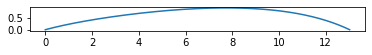

In [ ]:

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect('equal', adjustable='box')


plt.plot(x, y)
plt.show()


PART 2:

Convert problem to object oriented first

In [ ]:
class Frisbee(object):
  DTf = 0.001
  timef = 6
  stepsf = int(timef/DTf)
  g = -9.81

  def __init__(self, av_0, incl_0, p, a, m, vv_0, x_0, y_0):
    self.av_0 = av_0
    self.incl_0 = incl_0
    self.p = p
    self.a = a
    self.m = m
    self.vv_0 = vv_0
    self.x_0 = x_0
    self.y_0 = y_0

    #implicit variables
    self.aa_0 = abs(self.incl_0 - self.av_0)
    self.da_0 = (self.av_0 + math.pi)%(2*math.pi) 
    self.la_0 = (self.av_0 + math.pi/2)%(2*math.pi)

    self.cd_0 = 0.085 + 3.3*(self.aa_0 + 0.052)**2
    self.cl_0 = 0.13 + 3.09*self.aa_0

    self.drag_0 = 1/2 * p * a * self.cd_0 * vv_0**2 #initial magnitude of drag force, direction is opposite to velocity vector
    self.lift_0 = 1/2 * p * a * self.cl_0 * vv_0**2 #initial magnitude of lift force, perpendicular to velocity vector

    #simulator array init
    self.t = [0,]
    self.cd = [self.cd_0,] #coefficient of drag force
    self.cl = [self.cl_0,] #coefficient of lift force
    self.aa = [self.aa_0,] #attack angles
    self.da = [self.da_0,] #drift angles
    self.la = [self.la_0,] #lift angles 
    self.drag = [self.drag_0,] #drag vectors
    self.lift = [self.lift_0,] #lift vectors
    self.ax = [1/self.m * (self.lift_0*math.cos(self.la_0) + self.drag_0*math.cos(self.da_0)),] 
    self.ay = [1/self.m * (self.lift_0*math.sin(self.la_0) + self.drag_0*math.sin(self.la_0) + self.m*self.g),]
    self.vx = [self.vv_0 * math.cos(self.av_0),]
    self.vy = [self.vv_0 * math.sin(self.av_0),]
    self.x = [self.x_0,]
    self.y = [self.y_0,]
  
  def simulate(self):
    for i in range(self.stepsf):

      #break at the right time
      if self.y[i] < 0:
        break

      #update time
      self.t.append(self.t[i] + self.DTf)
 
      #update acceleration
      self.ax.append(1/self.m * (self.lift[i]*math.cos(self.la[i]) + self.drag[i]*math.cos(self.da[i])))
      self.ay.append(1/self.m * (self.lift[i]*math.sin(self.la[i]) + self.drag[i]*math.sin(self.la[i]) + self.m*self.g))

      #apply acceleration update to velocity
      self.vx.append(self.vx[i] + self.ax[i]*self.DTf)
      self.vy.append(self.vy[i] + self.ay[i]*self.DTf)

      #update attack angle
      self.av = math.atan(self.vy[i]/self.vx[i])
      self.incl = self.incl_0
      self.aa.append(abs(self.incl - self.av))

      #update drift and lift coefficients
      self.cd.append(0.085 + 3.3*(self.aa[i] + 0.052)**2)
      self.cl.append(0.13 + 3.09*self.aa[i])

      #update drift and lift vector angles
      self.da.append((self.av + math.pi)%(2*math.pi)) 
      self.la.append((self.av + math.pi/2)%(2*math.pi)) 

      #update drift and lift magnitudes
      self.v_mag = self.vx[i]/math.cos(self.av)
      self.drag.append(1/2 * self.p * self.a * self.cd[i] * self.v_mag**2) #initial magnitude of drag force, direction is opposite to velocity vector
      self.lift.append(1/2 * self.p * self.a * self.cl[i] * self.v_mag**2) #initial magnitude of lift force, perpendicular to velocity vector

      #apply velocity update to position
      self.x.append(self.x[i] + self.vx[i]*self.DTf)
      self.y.append(self.y[i] + self.vy[i]*self.DTf)

  def get_max_dist(self):
    return self.x[len(self.x)-1]

  def get_max_time(self):
    return self.t[len(self.t)-1]

  def plot(self):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_aspect('equal', adjustable='box')
    plt.plot(self.x,self.y)


Now, loop over a variety of initial velocity vector, velocity vector angle, and initial inclination angle to create all possible scenarios within the limits of our simulation.

In [ ]:
#redefine constants if need be:
p = 1.23 #air density constant
a = 0.05309 #cross section of frisbee
m = 0.175 #mass of frisbee
g = -9.81 #gravitational acceleration
x_0 = 0
y_0 = 0

In [ ]:
Frisbees = []
for vv in range(100, 900, 35):
  for av in range(0, 70, 1):
    for incl in range(0, 32, 1):
      frisbee = Frisbee(av*math.pi/180, incl*math.pi/180, p, a, m, float(vv)/100, x_0, y_0)
      try:
        frisbee.simulate() #for certain specific values (tends to happen more often the higher the velocity), Euler simulation starts yielding very large values for reasons unknown to me.
      except:
        print("Failed, skipping...")
      Frisbees.append(frisbee)
        

Get frisbees that land in our desired distance interval

In [ ]:
x_min, x_max = 9, 10 #setting uper and lower bound for distance travelled

In [ ]:
works = []
vvw = []
avw = []
inclw = []
tw =[]

for frisbee in Frisbees:
  lx = frisbee.get_max_dist()
  if lx >= x_min and lx <= x_max:
    works.append(frisbee)
    vvw.append(frisbee.vv_0)
    avw.append(frisbee.av_0*180/math.pi)
    inclw.append(frisbee.incl_0*180/math.pi)
    tw.append(frisbee.get_max_time())

Plot all the frisbee trajectories

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect('equal', adjustable='box')
for xf in works:
  plt.plot(xf.x, xf.y)

3D Scatter Plot showcasing all valid initial configurations

In [ ]:
plot_scatter = go.Scatter3d(
    x=vvw,
    y=avw,
    z=inclw,
    mode='markers',
    marker=dict(
        size=5,
        cmax=4,
        cmin=0,
        color=tw,
        colorbar=dict(title='Time taken to land in seconds'),
        colorscale='matter'
    )
)
plotData = [plot_scatter]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=plotData, layout=layout)

fig.update_layout(
    scene=dict(
        xaxis_title='X: Initial magnitude of velocity',
        yaxis_title='Y: Initial angle of velocity vector',
        zaxis_title='Z: Initial frisbee inclination angle',
    )
)
iplot(fig,filename='Interactive_3dScatter.html')